<a href="https://colab.research.google.com/github/dwintz14/LOTRsentimentanalysis/blob/master/LOTR_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dwintz14

Spring 2020

#Lord of the Rings Sentiment Analysis

## Data Pre-Processing

In [2]:
# Set up
from google.colab import drive
drive.mount('/content/drive')
import nltk
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [0]:
# Load the books
# Files can be found at: 
# https://www.kaggle.com/ashishsinhaiitr/lord-of-the-rings-text
file_location = '/content/drive/My Drive/*2020 Spring/Shakespeare and Tolkien'
with open( '{}/1-FOTR.txt'.format(file_location), 'r', encoding='latin-1') as infile:
    FOTR = infile.read()
FOTR = FOTR.lower()

file_location = '/content/drive/My Drive/*2020 Spring/Shakespeare and Tolkien'
with open( '{}/2-TTT.txt'.format(file_location), 'r', encoding='latin-1') as infile:
    TTT = infile.read()
TTT = TTT.lower()

file_location = '/content/drive/My Drive/*2020 Spring/Shakespeare and Tolkien'
with open( '{}/3-ROTK.txt'.format(file_location), 'r', encoding='latin-1') as infile:
    ROTK = infile.read()
ROTK = ROTK.lower()

In [0]:
# Split the books by chapter and take out the prologues
FOTR = FOTR.split("_chapter")
TTT = TTT.split("_chapter")
ROTK = ROTK.split("_chapter")

FOTR = FOTR[1:]
TTT = TTT[1:]
ROTK = ROTK[1:]

In [5]:
# Count the chapters per book
print('There are {} chapters in The Fellowship of the Ring.'.format(len(FOTR)))
print('There are {} chapters in The Two Towers.'.format(len(TTT)))
print('There are {} chapters in The Return of the King.'.format(len(ROTK)))

There are 22 chapters in The Fellowship of the Ring.
There are 21 chapters in The Two Towers.
There are 19 chapters in The Return of the King.


## Creating the Model

### Sentiment Analysis

In [0]:
# Create a list of positive scores by book and chapter
FOTR_pos = []
TTT_pos = []
ROTK_pos = []
LOTR_pos = []

sid = SentimentIntensityAnalyzer()
for i in FOTR:
  ss = sid.polarity_scores(i)
  FOTR_pos.append(ss['pos'])
  LOTR_pos.append(ss['pos'])
for i in TTT:
  ss = sid.polarity_scores(i)
  TTT_pos.append(ss['pos'])
  LOTR_pos.append(ss['pos'])
for i in ROTK:
  ss = sid.polarity_scores(i)
  ROTK_pos.append(ss['pos'])
  LOTR_pos.append(ss['pos'])

In [0]:
# Create a list of negative scores by chapter
FOTR_neg = []
TTT_neg = []
ROTK_neg = []
LOTR_neg = []

for i in FOTR:
  ss = sid.polarity_scores(i)
  FOTR_neg.append(ss['neg'])
  LOTR_neg.append(ss['neg'])
for i in TTT:
  ss = sid.polarity_scores(i)
  TTT_neg.append(ss['neg'])
  LOTR_neg.append(ss['neg'])
for i in ROTK:
  ss = sid.polarity_scores(i)
  ROTK_neg.append(ss['neg'])
  LOTR_neg.append(ss['neg'])

In [0]:
# Create a list of neutral scores by chapter
LOTR_neu = []

for i in FOTR:
  ss = sid.polarity_scores(i)
  LOTR_neu.append(ss['neu'])
for i in TTT:
  ss = sid.polarity_scores(i)
  LOTR_neu.append(ss['neu'])
for i in ROTK:
  ss = sid.polarity_scores(i)
  LOTR_neu.append(ss['neu'])

In [0]:
# Create a list of compound scores by chapter
FOTR_comp = []
TTT_comp = []
ROTK_comp = []
LOTR_comp = []

for i in FOTR:
  ss = sid.polarity_scores(i)
  FOTR_comp.append(ss['compound'])
  LOTR_comp.append(ss['compound'])
for i in TTT:
  ss = sid.polarity_scores(i)
  TTT_comp.append(ss['compound'])
  LOTR_comp.append(ss['compound'])
for i in ROTK:
  ss = sid.polarity_scores(i)
  ROTK_comp.append(ss['compound'])
  LOTR_comp.append(ss['compound'])

### Dataframe Construction

In [0]:
# Assign chapter and book names
ch_names = ['A Long-expected Party', 'The Shadow of the Past', 'Three is Company', 'A Short Cut to Mushrooms',
            'A Conspiracy Unmasked', 'The Old Forest', 'In the House of Tom Bombadil', 'Fog on the Barrow-downs',
            'At the Sign of the Prancing Pony', 'Strider', 'A Knife in the Dark', 'Flight to the Ford',
            'Many Meetings', 'The Council of Elrond', 'The Ring goes South', 'A Journey in the Dark',
            'The Bridge of Khazad-dûm', 'Lothlórien', 'The Mirror of Galadriel', 'Farewell to Lórien',
            'The Great River', 'The Breaking of the Fellowship', 'The Departure of Boromir', 'The Riders of Rohan',
            'The Uruk-hai', 'Treebeard', 'The White Rider', 'The King of the Golden Hall', 'Helm\'s Deep',
            'The Road to Isengard', 'Flotsam and Jetsam', 'The Voice of Saruman', 'The Palantír', 'The Taming of Sméagol',
            'The Passage of the Marshes', 'The Black Gate is Closed', 'Of Herbs and Stewed Rabbit', 'The Window on the West',
            'The Forbidden Pool', 'Journey to the Cross-roads', 'The Stairs of Cirith Ungol', 'Shelob\'s Lair',
            'The Choices of Master Samwise', 'Minas Tirith', 'The Passing of the Grey Company', 'The Muster of Rohan',
            'The Siege of Gondor', 'The Ride of the Rohirrim', 'The Battle of the Pelennor Fields', 'The Pyre of Denethor',
            'The Houses of Healing', 'The Last Debate', 'The Black Gate Opens', 'The Tower of Cirith Ungol',
            'The Land of Shadow', 'Mount Doom', 'The Field of Cormallen', 'The Steward and the King', 'Many Partings',
            'Homeward Bound', 'The Scouring of the Shire', 'The Grey Havens']

book_num = []
for i in range(1, 13):
  book_num.append('Book 1')
for i in range(1, 11):
  book_num.append('Book 2')
for i in range(1, 12):
  book_num.append('Book 3')
for i in range(1, 11):
  book_num.append('Book 4')
for i in range(1, 11):
  book_num.append('Book 5')
for i in range(1, 10):
  book_num.append('Book 6')

book_name = []
for i in range(1, 23):
  book_name.append('The Fellowship of the Ring')
for i in range(1, 22):
  book_name.append('The Two Towers')
for i in range(1, 20):
  book_name.append('The Return of the King')

index = []
for i in range(1, 63):
  index.append(i)

col = ['Book Name', 'Book Number', 'Chapter Name', 'Positive SS', 'Negative SS', 'Neutral SS', 'Compound SS']

In [11]:
# Creating a data frame
LOTR_dataset = [book_name, book_num, ch_names, LOTR_pos, LOTR_neg, LOTR_neu, LOTR_comp]
pd.set_option('display.max_rows', None)
LOTR_df = pd.DataFrame(data=LOTR_dataset, index=col, columns=index)
LOTR_df = LOTR_df.transpose()
LOTR_df


,Book Name,Book Number,Chapter Name,Positive SS,Negative SS,Neutral SS,Compound SS
1,The Fellowship of the Ring,Book 1,A Long-expected Party,0.126,0.059,0.815,1
2,The Fellowship of the Ring,Book 1,The Shadow of the Past,0.127,0.099,0.774,0.9999
3,The Fellowship of the Ring,Book 1,Three is Company,0.099,0.055,0.846,0.9999
4,The Fellowship of the Ring,Book 1,A Short Cut to Mushrooms,0.086,0.075,0.838,0.9983
5,The Fellowship of the Ring,Book 1,A Conspiracy Unmasked,0.122,0.062,0.816,0.9999
6,The Fellowship of the Ring,Book 1,The Old Forest,0.091,0.077,0.832,0.9991
7,The Fellowship of the Ring,Book 1,In the House of Tom Bombadil,0.128,0.059,0.813,0.9999
8,The Fellowship of the Ring,Book 1,Fog on the Barrow-downs,0.111,0.08,0.81,0.9998
9,The Fellowship of the Ring,Book 1,At the Sign of the Prancing Pony,0.092,0.064,0.844,0.9997
10,The Fellowship of the Ring,Book 1,Strider,0.111,0.085,0.804,0.9996


## Visualizing the Results

### Positive and Negative

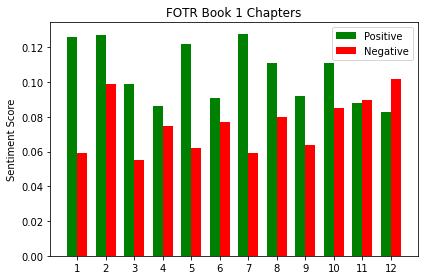

In [12]:
# FOTR Book 1 positive and negative bar graph
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, FOTR_pos[0:12], width, label='Positive', color='green')
rects2 = ax.bar(x + width/2, FOTR_neg[0:12], width, label='Negative', color='red')

ax.set_ylabel('Sentiment Score')
ax.set_title('FOTR Book 1 Chapters')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

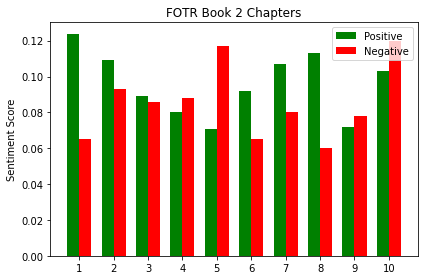

In [13]:
# FOTR Book 2 positive and negative bar graph
x = np.arange(len(labels[:10]))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, FOTR_pos[12:22], width, label='Positive', color='green')
rects2 = ax.bar(x + width/2, FOTR_neg[12:22], width, label='Negative', color='red')

ax.set_ylabel('Sentiment Score')
ax.set_title('FOTR Book 2 Chapters')
ax.set_xticks(x)
ax.set_xticklabels(labels[:10])
ax.legend()

fig.tight_layout()

plt.show()

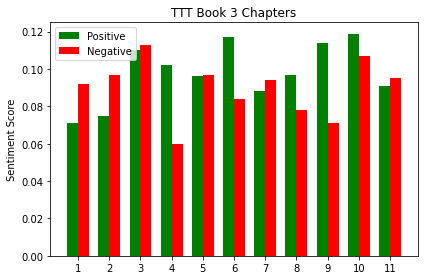

In [14]:
# TTT Book 3 positive and negative bar graph
x = np.arange(len(labels[:11]))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, TTT_pos[:11], width, label='Positive', color='green')
rects2 = ax.bar(x + width/2, TTT_neg[:11], width, label='Negative', color='red')

ax.set_ylabel('Sentiment Score')
ax.set_title('TTT Book 3 Chapters')
ax.set_xticks(x)
ax.set_xticklabels(labels[:11])
ax.legend()

fig.tight_layout()

plt.show()

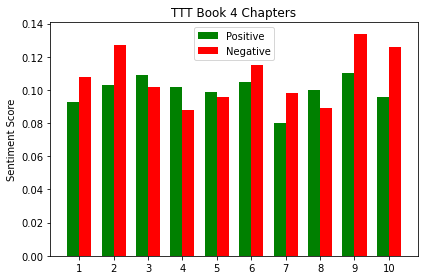

In [15]:
# TTT Book 4 positive and negative bar graph
x = np.arange(len(labels[:10]))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, TTT_pos[11:21], width, label='Positive', color='green')
rects2 = ax.bar(x + width/2, TTT_neg[11:21], width, label='Negative', color='red')

ax.set_ylabel('Sentiment Score')
ax.set_title('TTT Book 4 Chapters')
ax.set_xticks(x)
ax.set_xticklabels(labels[:10])
ax.legend()

fig.tight_layout()

plt.show()



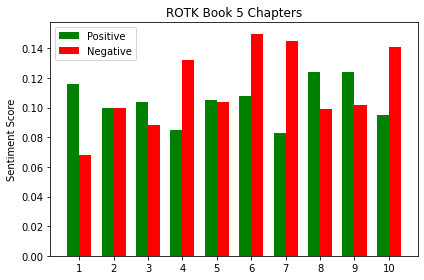

In [16]:
# ROTK Book 5 positive and negative bar graph
x = np.arange(len(labels[:10]))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ROTK_pos[:10], width, label='Positive', color='green')
rects2 = ax.bar(x + width/2, ROTK_neg[:10], width, label='Negative', color='red')

ax.set_ylabel('Sentiment Score')
ax.set_title('ROTK Book 5 Chapters')
ax.set_xticks(x)
ax.set_xticklabels(labels[:10])
ax.legend()

fig.tight_layout()

plt.show()

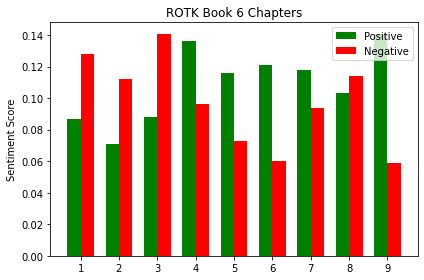

In [17]:
# ROTK Book 6 positive and negative bar graph
x = np.arange(len(labels[:9]))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ROTK_pos[10:19], width, label='Positive', color='green')
rects2 = ax.bar(x + width/2, ROTK_neg[10:19], width, label='Negative', color='red')

ax.set_ylabel('Sentiment Score')
ax.set_title('ROTK Book 6 Chapters')
ax.set_xticks(x)
ax.set_xticklabels(labels[:9])
ax.legend()
fig.tight_layout()
plt.show()

### Compound

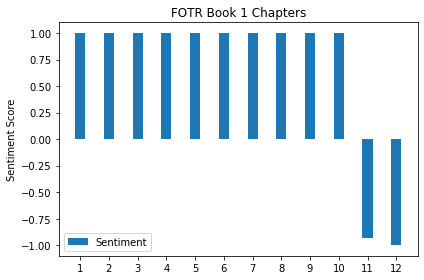

In [18]:
# FOTR Book 1 compound bar graph
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x, FOTR_comp[:12], width, label='Sentiment')

ax.set_ylabel('Sentiment Score')
ax.set_title('FOTR Book 1 Chapters')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.show()

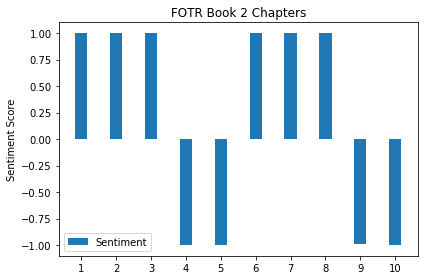

In [19]:
# FOTR Book 2 compound bar graph
x = np.arange(len(labels[:10]))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x, FOTR_comp[12:], width, label='Sentiment')

ax.set_ylabel('Sentiment Score')
ax.set_title('FOTR Book 2 Chapters')
ax.set_xticks(x)
ax.set_xticklabels(labels[:10])
ax.legend()
fig.tight_layout()
plt.show()

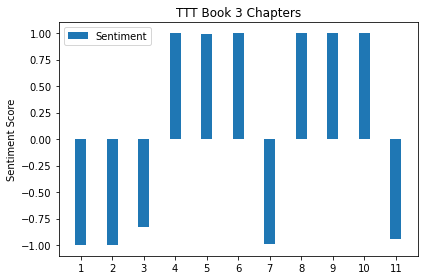

In [20]:
# TTT Book 3 compound bar graph
x = np.arange(len(labels[:11]))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x, TTT_comp[:11], width, label='Sentiment')

ax.set_ylabel('Sentiment Score')
ax.set_title('TTT Book 3 Chapters')
ax.set_xticks(x)
ax.set_xticklabels(labels[:11])
ax.legend()
fig.tight_layout()
plt.show()

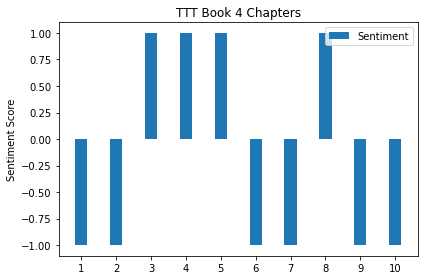

In [21]:
# TTT Book 4 compound bar graph
x = np.arange(len(labels[:10]))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x, TTT_comp[11:], width, label='Sentiment')

ax.set_ylabel('Sentiment Score')
ax.set_title('TTT Book 4 Chapters')
ax.set_xticks(x)
ax.set_xticklabels(labels[:10])
ax.legend()
fig.tight_layout()
plt.show()

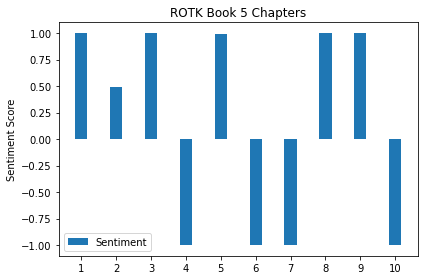

In [22]:
# ROTK Book 5 compound bar graph
x = np.arange(len(labels[:10]))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x, ROTK_comp[:10], width, label='Sentiment')

ax.set_ylabel('Sentiment Score')
ax.set_title('ROTK Book 5 Chapters')
ax.set_xticks(x)
ax.set_xticklabels(labels[:10])
ax.legend()
fig.tight_layout()
plt.show()

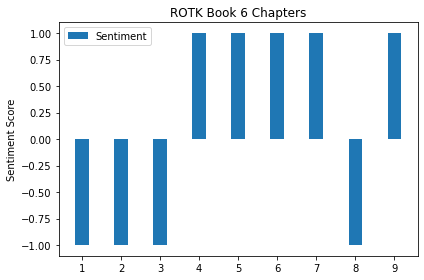

In [23]:
# ROTK Book 6 compound bar graph
x = np.arange(len(labels[:9]))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x, ROTK_comp[10:], width, label='Sentiment')

ax.set_ylabel('Sentiment Score')
ax.set_title('ROTK Book 6 Chapters')
ax.set_xticks(x)
ax.set_xticklabels(labels[:10])
ax.legend()
fig.tight_layout()
plt.show()